In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Marketing_Campaign_Dataset.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

In [4]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.nunique()

ID                     100279
Year_Birth                103
Education                   5
Marital_Status              8
Income                 100209
Kidhome                     3
Teenhome                    3
Dt_Customer               663
Recency                    99
MntWines                 1493
MntFruits                 199
MntMeatProducts          1725
MntFishProducts           259
MntSweetProducts          263
MntGoldProds              362
NumDealsPurchases          15
NumWebPurchases            27
NumCatalogPurchases        28
NumStorePurchases          13
NumWebVisitsMonth          20
AcceptedCmp3                2
AcceptedCmp4                2
AcceptedCmp5                2
AcceptedCmp1                2
AcceptedCmp2                2
Complain                    2
Z_CostContact               1
Z_Revenue                   1
Response                    2
dtype: int64

In [7]:
object_cols = []
float_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        object_cols.append(col)
    elif df[col].dtype == 'float64':
        float_cols.append(col)
print('Number of objects', len(object_cols))
print('Number of floats', len(float_cols))


Number of objects 3
Number of floats 1


In [8]:
object_cols

['Education', 'Marital_Status', 'Dt_Customer']

In [9]:
float_cols

['Income']

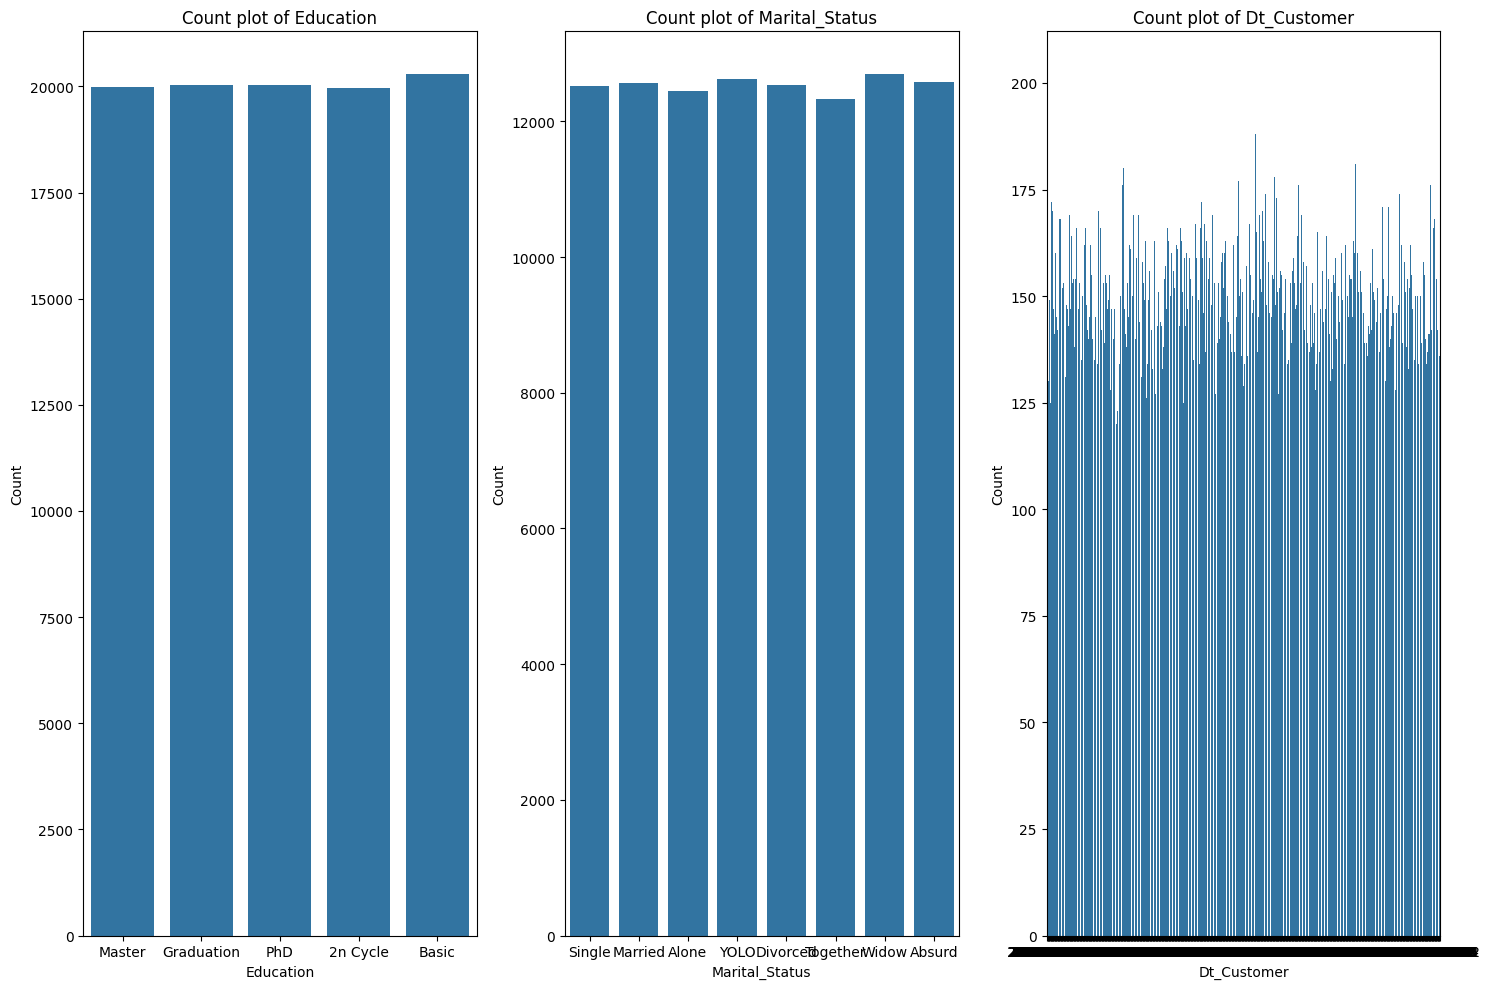

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(object_cols):
    plt.subplot(1,len(object_cols),i+1)
    sns.countplot(x = col, data = df)
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout();


In [11]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in 'Basic':
        return 'Middle'
    else:
        return 'Low'
df['Education_level'] = df['Education'].apply(education_level)

In [12]:
def status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living With Others'
df['Status'] = df['Marital_Status'].apply(status)

In [13]:
for col in df.columns:
    if df[col].dtypes == 'object':
        lae = LabelEncoder()
        df[col] = lae.fit_transform(df[col])

In [14]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  int64  
 3   Marital_Status       100279 non-null  int64  
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Recency              100279 non-null  int64  
 8   MntWines             100279 non-null  int64  
 9   MntFruits            100279 non-null  int64  
 10  MntMeatProducts      100279 non-null  int64  
 11  MntFishProducts      100279 non-null  int64  
 12  MntSweetProducts     100279 non-null  int64  
 13  MntGoldProds         100279 non-null  int64  
 14  NumDealsPurchases    100279 non-null  int64  
 15  NumWebPurchases  

In [16]:
#Edit
df['Age'] = 2025 - df['Year_Birth']
df['Children'] = df['Kidhome']+df['Teenhome']

In [17]:
#Edit
drop_cols = ['ID','Education','Complain','Response','AcceptedCmp5','AcceptedCmp4','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','Marital_Status',
             'Year_Birth','Kidhome','Teenhome']
for col in drop_cols:
    df.drop(col,axis = 1,inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Income               100279 non-null  float64
 1   Recency              100279 non-null  int64  
 2   MntWines             100279 non-null  int64  
 3   MntFruits            100279 non-null  int64  
 4   MntMeatProducts      100279 non-null  int64  
 5   MntFishProducts      100279 non-null  int64  
 6   MntSweetProducts     100279 non-null  int64  
 7   MntGoldProds         100279 non-null  int64  
 8   NumDealsPurchases    100279 non-null  int64  
 9   NumWebPurchases      100279 non-null  int64  
 10  NumCatalogPurchases  100279 non-null  int64  
 11  NumStorePurchases    100279 non-null  int64  
 12  NumWebVisitsMonth    100279 non-null  int64  
 13  Education_level      100279 non-null  int64  
 14  Status               100279 non-null  int64  
 15  Age              

In [19]:
normal = Normalizer()
df_nm = normal.fit_transform(df)

In [20]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_nm)
pca.explained_variance_ratio_

array([0.83573456, 0.13047654, 0.01203127])

In [21]:
distance = []
for clusters in range(1,20):
    model = KMeans(init = 'k-means++', n_clusters = clusters,max_iter=400, random_state = 10)
    model.fit(df_pca)
    distance.append(model.inertia_)
distance

[127.60021365217719,
 55.04310684835123,
 36.171839309983355,
 29.135586667883203,
 23.472257975434307,
 19.71526814056235,
 17.100295458319884,
 15.000189592463336,
 13.508856323193339,
 12.478633566450124,
 11.323888259419363,
 10.624552332725788,
 9.910604594711106,
 9.043789745638293,
 8.446181283743911,
 7.985896273457952,
 7.669893965203936,
 7.276360251506404,
 6.902226792099313]

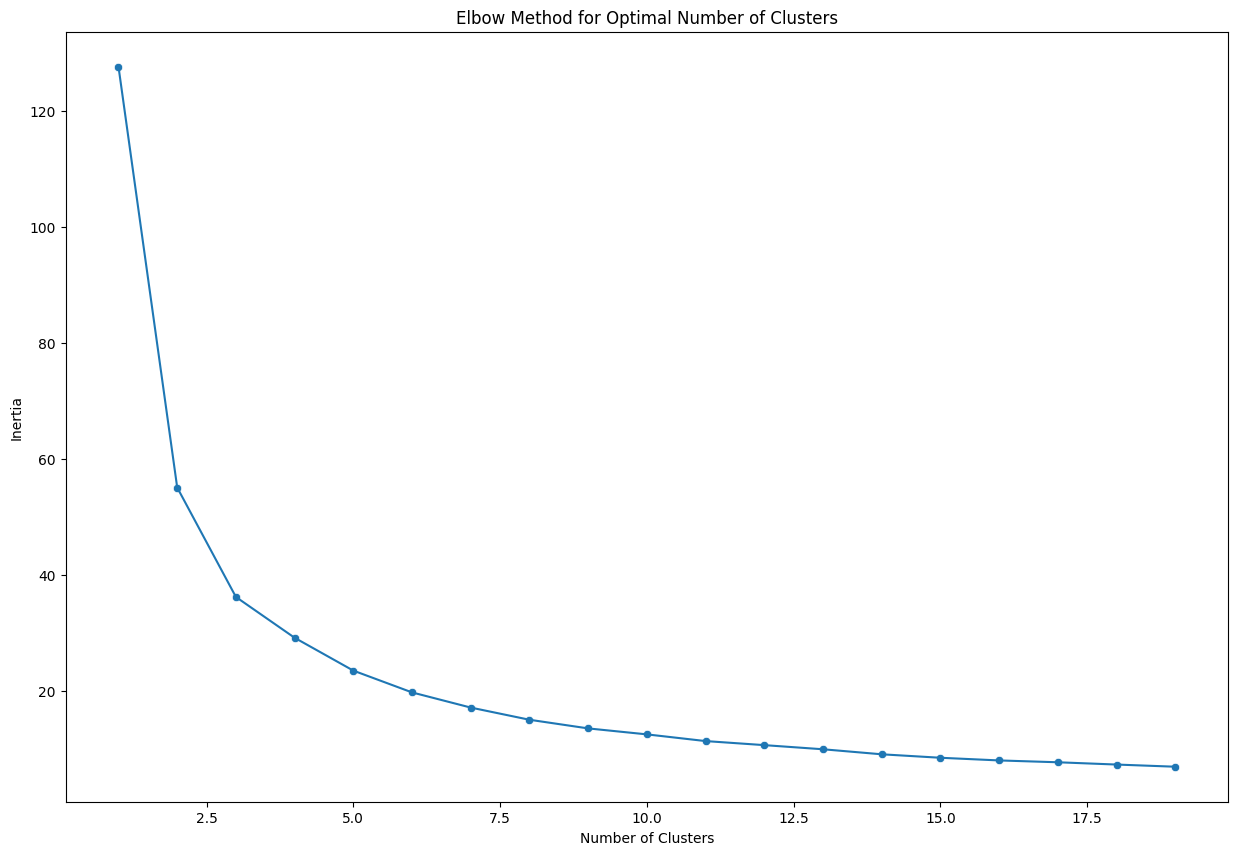

In [22]:
plt.figure(figsize = (15,10))
sns.lineplot(x = range(1,20), y = distance)
sns.scatterplot(x = range(1,20), y = distance)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [23]:
#Edit
model = KMeans(init = 'k-means++',n_clusters = 4,max_iter = 400, random_state = 2)
prediction = model.fit_predict(df_pca)
model.inertia_

29.135586667883203

In [24]:
#Edit
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(df_pca, prediction)
print(f"Davies–Bouldin Score: {db_score:.4f}")

Davies–Bouldin Score: 0.9056


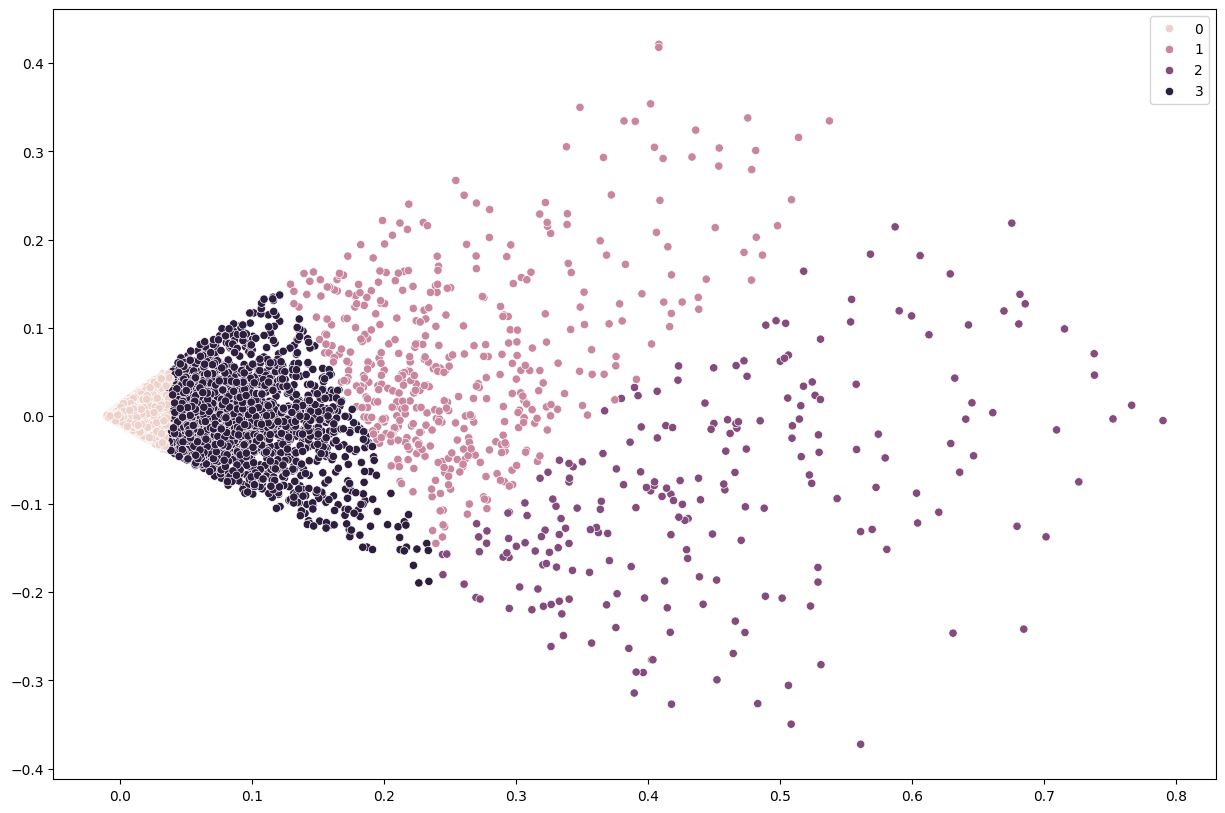

In [25]:
#Edit
plt.figure(figsize = (15,10))
sns.scatterplot(x =df_pca[:,0], y= df_pca[:,1], hue = prediction)
plt.show()

In [26]:
#Edit
silhouette_score(df_pca, prediction)

np.float64(0.891494658992675)

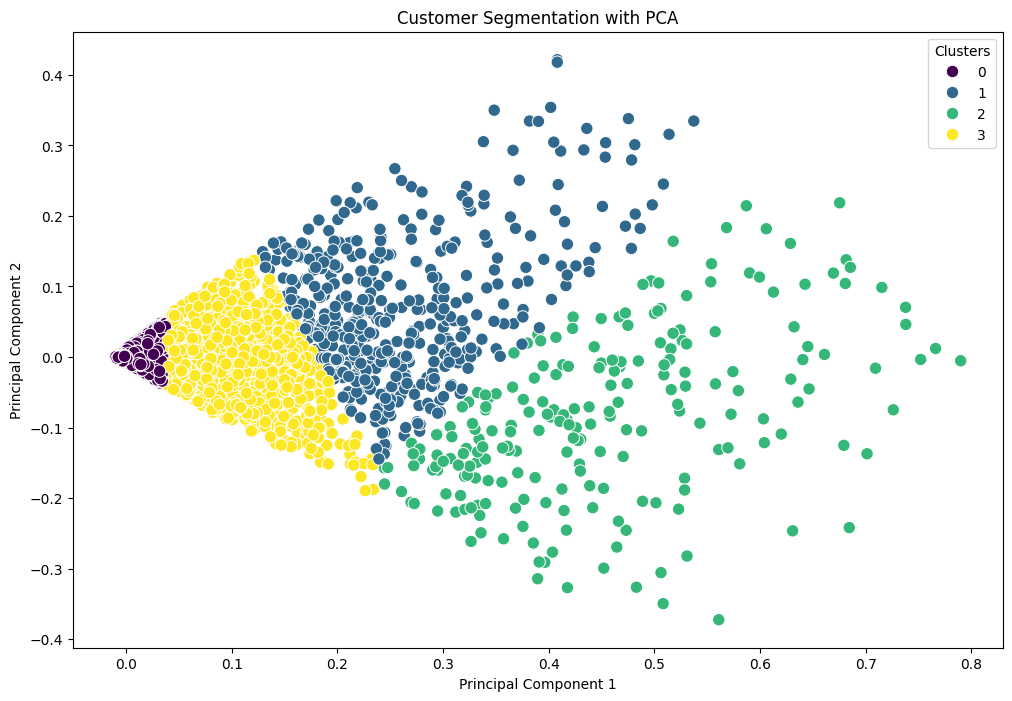

In [27]:
# PCA-Based Cluster Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=prediction, palette="viridis", s=80)
plt.title("Customer Segmentation with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.show()

In [28]:
df["Cluster"] = prediction

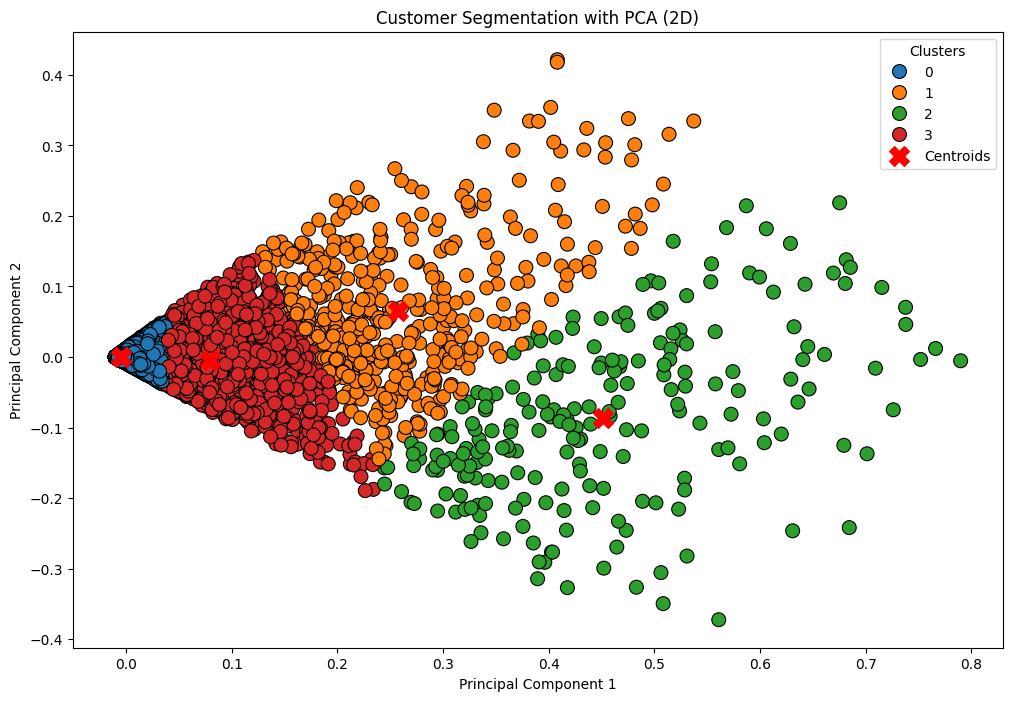

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=prediction, palette="tab10", s=100, edgecolor="black")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("Customer Segmentation with PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.show()

Number of customers in each cluster:
Cluster
0    96859
1      455
2      222
3     2743
Name: count, dtype: int64


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_2624\4242090857.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="tab10")


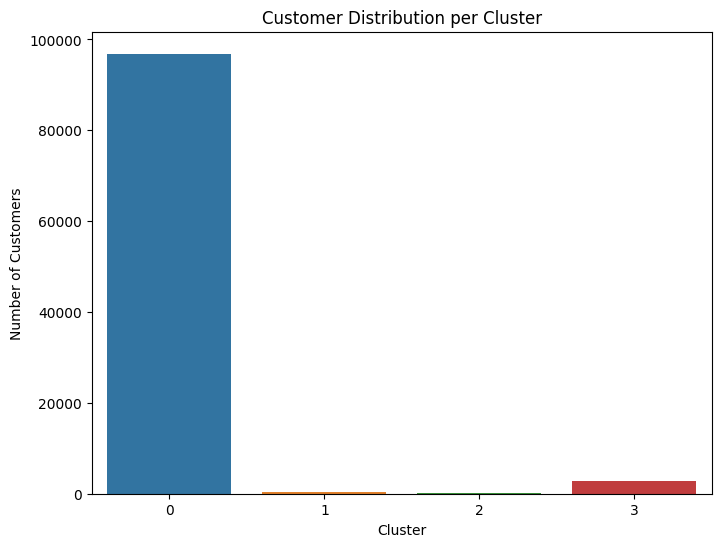

In [30]:
# Count the number of customers in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Print the counts
print("Number of customers in each cluster:")
print(cluster_counts)

# ✅ **Visualizing the Cluster Distribution**
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="tab10")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution per Cluster")
plt.xticks(rotation=0)
plt.show()


In [31]:
import joblib

# Save the trained model
joblib.dump(model, 'customer_segmentation.pkl')

# Save the PCA model to transform user input later
joblib.dump(pca, 'pca_model.pkl')


['pca_model.pkl']

In [32]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
df_normalized = normalizer.fit_transform(df.drop(['Cluster'], axis=1, errors='ignore'))



In [33]:
# Use the clusters as target labels for classification
X = df_normalized
y = df['Cluster']  # Make sure 'Cluster' exists in your dataset



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [35]:
# Train a classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [36]:
# Evaluate the classifier
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9992022337455125
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19342
           1       0.99      0.96      0.98        83
           2       0.98      1.00      0.99        42
           3       0.98      0.99      0.99       589

    accuracy                           1.00     20056
   macro avg       0.99      0.99      0.99     20056
weighted avg       1.00      1.00      1.00     20056



In [37]:
import pickle

In [38]:
# Save classification model
with open('classification_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)

print("Classification model saved successfully!")


Classification model saved successfully!


In [39]:
df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Education_level', 'Status',
       'Age', 'Children', 'Cluster'],
      dtype='object')

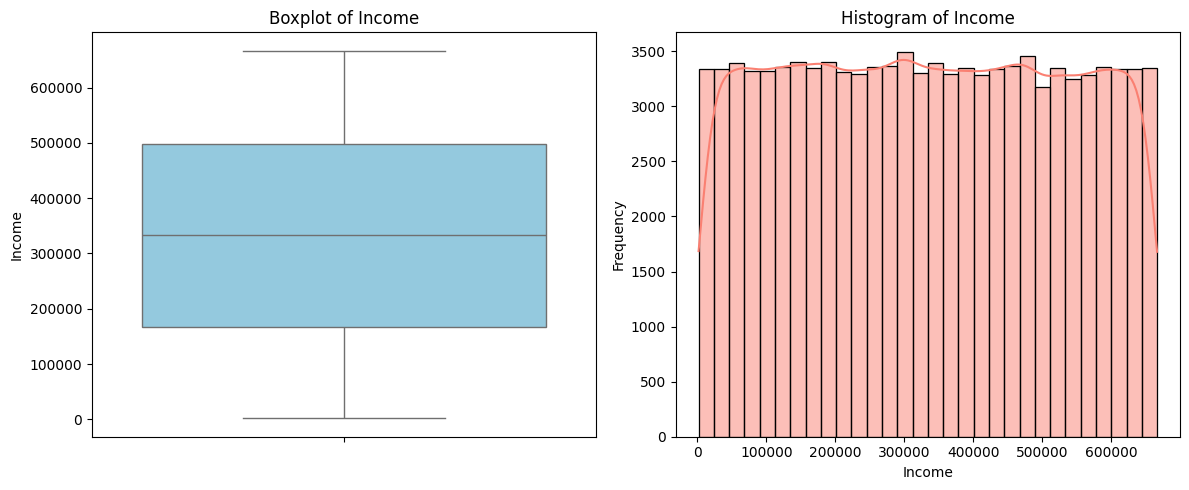

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample column name (Replace 'Income' with any continuous variable)
column = "Income"

# Assuming df is your DataFrame
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=df[column], color="skyblue")
plt.title(f'Boxplot of {column}')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df[column], bins=30, kde=True, color="salmon")
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [42]:
from sklearn.preprocessing import Normalizer
normal = Normalizer()
normal.fit(df)
joblib.dump(normal,'normal.pkl')

['normal.pkl']